# CAPSTON PROJECT-THE BATTLE OF NEIGHBORHOOD

### Unification of Restaurants based on Cuisine type in Downtown TORONTO, Canada and suggesting optimum cluster to Open an Indian Restaurant

### Introduction: -
Toronto city in Canada is one of the most multicultural & lively cities in the world, this is the reason Toronto comes in Top 10 best cities to live in and attract a lot of tourists from all over the Globe. The city is famous of beautiful lakes, sceneries and outdoor life. The one major characteristic of this city is that it is having more than 50% population which are migrated from outside of Canada.
This has resulted in diverse food choices of people who are living here or the tourists who usually visit in seasonal time. Due to this there are around 7500 restaurants of different cuisine styles are opened like German, Italian, Japanese, Indian, Asian and so on. 
### Description of Problem Statement: -
As it becomes hard to conclude the choices of which area/restaurant to visit in a long list of restaurants or which are the best restaurant venues nearby or a suggestion to open an Indian restaurant in which neighborhood where it could attract more people and could possibly generate more revenue. 
In this project we will analyze most famous area ‘Downtown Toronto’ of Toronto city using its demographics characteristics and will visualize which specific cuisine restaurants are most common in certain  neighborhoods using clustering methodology  so that tourists could plan the trip based on their food choices and also we will try to identify the neighborhoods where an Indian restaurant could be opened based on existing restaurant number and food style priorities.


#### To install all required libraries

In [2]:
import numpy as np

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means for clustering stage
from sklearn.cluster import KMeans

#!pip install folium==0.5.0
import folium # map rendering library

print('Libraries installed.')

Libraries installed.


###  read_html function is used to read the table from wikipedia page to extract information about neighborhoods

In [3]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M',header = 0)

print(type(data)) # here the output is having multiple tables so we will use first table

table = pd.DataFrame(data[0])
table.head()

<class 'list'>


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### the shape of the Data table is 

In [4]:
print('the number of rows and columns in the table are :', table.shape)

the number of rows and columns in the table are : (180, 3)


## DATA CLEANING PROCESS

### identification of  'Not assigned' values in Neighborhood and replacing them with Borough values and will remove entries from Borough column where value is 'Not assigned'

In [5]:
    table.loc[table['Neighbourhood'] =='Not assigned', 'Neighbourhood'] = table['Borough']

print('shape of table before removing "Not Assigned" from Borough is :',table.shape)

t1 = table[table['Borough'] != 'Not assigned'].reset_index(drop = True)
print('shape of table After removing Not assigned and replacing Neighborhood[not assigned] by Borough value is :',t1.shape)
print('number of unique postal code values are :',t1['Postal Code'].nunique())

shape of table before removing "Not Assigned" from Borough is : (180, 3)
shape of table After removing Not assigned and replacing Neighborhood[not assigned] by Borough value is : (103, 3)
number of unique postal code values are : 103


 ### here value of unique entries in postal code and table are same which means there is no repeated value in Postal code column

In [6]:
print('final shape of table is :',t1.shape)
t1.head()

final shape of table is : (103, 3)


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
# !wget http://cocl.us/Geospatial_data
location = pd.read_csv('http://cocl.us/Geospatial_data')
location.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Now above table is merged with toronto table 't1' and 'Inner Join' is used to filter from the table

In [8]:
geolocation = t1.merge(location,how = "inner",on = "Postal Code",suffixes=["Latitude","-Longitude"]).reset_index(drop = True)
geolocation

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


### Lets extract the Information from 'Borough' which contains 'DownTown Toronto'

In [9]:
toronto_data = geolocation[geolocation['Borough'].str.contains('Downtown Toronto')].reset_index(drop=True)
print(toronto_data.shape)
toronto_data

(19, 5)


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


### First visualize 'Neighborhoods of  ' DOWNTOWN Toronto' on map using Folium library

In [10]:
# to extract lat long of DOwntown area
address = 'Downtown Toronto'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6563221, -79.3809161.


In [11]:
address = ' DownTown Toronto ,Toronto,CA'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of TORONTO using latitude and longitude values
map_cntrltoronto = folium.Map(location=[latitude, longitude], zoom_start= 11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], 
                                           toronto_data['Borough'], toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cntrltoronto)  
    
map_cntrltoronto

## EXPLORING VENUES in 'DOWNTOWN TORONTO'


### Here we need to add FOURSQUARE ID to extract data from the API

In [43]:
# @hidden celll

CLIENT_ID = 'V5NMA5HFUVDH1DKBLOO1CM1YX0IZFDOB4VSVDSDS0TZTCL2D' # your Foursquare ID
CLIENT_SECRET = 'SJIOMON1TWIAHZLKGBIAHAZRWSMXF31CITWJJOO4L2XHJDHM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


#### First we need to define a function to get details of each neighborhood in Downtown toronto

In [13]:
def get_near_by_venues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # GET request to be made to extract venue data from the API in .json format
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby_venue
        venues_list.append([(name, lat, lng, 
                             v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name']) for v in results])

        
#As it is seen that .json create a lot of information and we need to convert it into a dataframe with relevent information 
    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ['Neighbourhood','Neighbourhood Latitude', 'Neighbourhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return nearby_venues

### Getting all nearby venues for all neighbourhoods in Downtown Toronto

In [14]:
toronto_venues = get_near_by_venues(names=toronto_data['Neighbourhood'],latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])
print(toronto_venues.shape)
toronto_venues.head()

(1253, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


### Modify and clean venue dataset and filter out only Restaurants from velue category

In [15]:
toronto_venues_restaurants = toronto_venues[toronto_venues['Venue Category'].str.contains(' Restaurant')].reset_index(drop=True)
toronto_venues_restaurants.index = np.arange(1, len(toronto_venues_restaurants )+1)
toronto_venues_restaurants.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
2,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
3,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Nando's,43.661728,-79.386391,Portuguese Restaurant
4,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Mercatto,43.660391,-79.387664,Italian Restaurant
5,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Tokyo Sushi,43.665885,-79.386977,Sushi Restaurant


### Filter out the Restaurant venues and group by neighborhood

In [16]:
toronto_rest_types=toronto_venues_restaurants[toronto_venues_restaurants['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
toronto_rest_types=toronto_venues_restaurants.groupby('Venue Category').count()
toronto_rest_types.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Afghan Restaurant,1,1,1,1,1,1
American Restaurant,16,16,16,16,16,16
Asian Restaurant,9,9,9,9,9,9
Belgian Restaurant,2,2,2,2,2,2
Brazilian Restaurant,2,2,2,2,2,2


## Identify Neighborhoods where there are Indian Restaurants

In [17]:
#Identify Neighborhoods where there are Indian Restaurants
indian_restaurants = toronto_venues[toronto_venues['Venue Category'].str.contains('Indian Restaurant')].reset_index(drop=True)
#indian_restaurants.index = np.arange(1, len(toronto_venues_restaurants )+1)
indian_restaurants

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Bay Street,43.657952,-79.387383,Colaba Junction,43.660940,-79.385635,Indian Restaurant
1,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,Indian Roti House,43.639060,-79.385422,Indian Restaurant
2,"St. James Town, Cabbagetown",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
3,Church and Wellesley,43.665860,-79.383160,Kothur Indian Cuisine,43.667872,-79.385659,Indian Restaurant


In [18]:
histogram_restaurants = pd.DataFrame(toronto_venues_restaurants['Venue Category'].value_counts()[0:21].reset_index())
histogram_restaurants.rename(index=str, columns={"index": "RestaurantType",'Venue Category': "Count"}, inplace=True)
# Here we dropped the name 'Restaurant' as we are not sure which type of cuisine it serves
histogram_restaurants = histogram_restaurants[histogram_restaurants['RestaurantType'] != 'Restaurant']
histogram_restaurants

,RestaurantType,Count
0,Japanese Restaurant,31
1,Italian Restaurant,22
2,Seafood Restaurant,20
3,Sushi Restaurant,17
4,American Restaurant,16
5,Thai Restaurant,15
6,Vegetarian / Vegan Restaurant,14
7,Mexican Restaurant,9
8,Asian Restaurant,9
9,New American Restaurant,8


### Graphical representation of number of restaurants in 'Downtown Toronto'

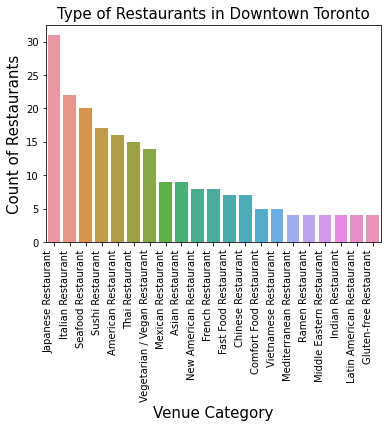

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="RestaurantType", y="Count", data=histogram_restaurants)
s.set_xticklabels(s.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.title('Type of Restaurants in Downtown Toronto', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Count of Restaurants", fontsize=15)
plt.show()

### Extract information about which neighborhood has highest number of restaurants

In [20]:
most_restaurants = toronto_venues_restaurants.groupby('Neighbourhood').count().sort_values('Venue Category',ascending=False)
print('Highest number of restuarants are',most_restaurants.reset_index().iloc[0,1],'and in ', most_restaurants.reset_index().iloc[0,0])
most_restaurants

Highest number of restuarants are 25 and in  First Canadian Place, Underground city


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"First Canadian Place, Underground city",25,25,25,25,25,25
"Commerce Court, Victoria Hotel",23,23,23,23,23,23
"Kensington Market, Chinatown, Grange Park",21,21,21,21,21,21
"Toronto Dominion Centre, Design Exchange",21,21,21,21,21,21
Church and Wellesley,21,21,21,21,21,21
"Garden District, Ryerson",20,20,20,20,20,20
St. James Town,20,20,20,20,20,20
"Richmond, Adelaide, King",19,19,19,19,19,19
Stn A PO Boxes,19,19,19,19,19,19


### Lets identify Unique categories from the venues dataframe

In [21]:
print('There are {} uniques categories.'.format(len(toronto_venues_restaurants['Venue Category'].unique())))

There are 43 uniques categories.


## Let's analyze Each Neighborhood

In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues_restaurants['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]


print("shape of dataframe is :",toronto_onehot.shape)

# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
print(Toronto_grouped.shape)
Toronto_grouped

shape of dataframe is : (253, 44)
(17, 44)


,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Seafood Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.00,0.000000,0.090909,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.181818,0.0,0.090909,0.0,0.090909,0.000000,0.090909,0.000000
1,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,0.00,0.000000,0.000000,0.052632,0.157895,0.105263,0.052632,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.0,0.052632,0.052632,0.052632,0.052632,0.0,0.052632,0.0,0.105263,0.000000,0.052632,0.000000
2,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,Church and Wellesley,0.047619,0.047619,0.000000,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.00,0.000000,0.000000,0.047619,0.000000,0.190476,0.000000,0.000000,0.095238,0.047619,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.047619,0.000000,0.0,0.190476,0.0,0.000000,0.047619,0.000000,0.047619
4,"Commerce Court, Victoria Hotel",0.000000,0.130435,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.043478,0.00,0.043478,0.000000,0.000000,0.086957,0.130435,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.043478,0.000000,0.000000,0.130435,0.0,0.043478,0.0,0.086957,0.000000,0.086957,0.000000
5,"First Canadian Place, Underground city",0.000000,0.120000,0.120000,0.000000,0.040000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.040000,0.040000,0.000000,0.000000,0.160000,0.000000,0.040000,0.040000,0.000000,0.000000,0.000000,0.000000,0.0,0.040000,0.000000,0.000000,0.120000,0.0,0.080000,0.0,0.080000,0.000000,0.040000,0.000000
6,"Garden District, Ryerson",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.100000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.100000,0.150000,0.000000,0.000000,0.000000,0.050000,0.100000,0.050000,0.000000,0.0,0.050000,0.000000,0.100000,0.050000,0.0,0.050000,0.0,0.050000,0.000000,0.000000,0.050000
7,"Harbourfront East, Union Station, Toronto Islands",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.100000,0.200000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.0,0.

### Let's print each neighborhood along with the top 10 most common venues

In [23]:
num_top_venues = 10

for hood in Toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                           venue  freq
0             Seafood Restaurant  0.18
1    Eastern European Restaurant  0.09
2        Comfort Food Restaurant  0.09
3             Italian Restaurant  0.09
4               Greek Restaurant  0.09
5              French Restaurant  0.09
6            Japanese Restaurant  0.09
7  Vegetarian / Vegan Restaurant  0.09
8                Thai Restaurant  0.09
9               Sushi Restaurant  0.09


----Central Bay Street----
                        venue  freq
0          Italian Restaurant  0.16
1             Thai Restaurant  0.11
2         Japanese Restaurant  0.11
3       Portuguese Restaurant  0.05
4           Korean Restaurant  0.05
5           French Restaurant  0.05
6   Middle Eastern Restaurant  0.05
7  Modern European Restaurant  0.05
8          Falafel Restaurant  0.05
9           Indian Restaurant  0.05


----Christie----
                             venue  freq
0               Italian Restaurant   1.0
1                Afghan R

### we need to sort the venues first so define a function to do this

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 15 venues for each neighborhood.

In [25]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = Toronto_grouped['Neighbourhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Berczy Park,Seafood Restaurant,Comfort Food Restaurant,Thai Restaurant,Greek Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant,Eastern European Restaurant,Dumpling Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Vietnamese Restaurant
1,Central Bay Street,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,New American Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Falafel Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Seafood Restaurant,Sushi Restaurant
2,Christie,Italian Restaurant,Vietnamese Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant,Dim Sum Restaurant,Comfort Food Restaurant,Colombian Restaurant
3,Church and Wellesley,Sushi Restaurant,Japanese Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Indian Restaurant,Afghan Restaurant,Theme Restaurant,Ramen Restaurant,Falafel Restaurant
4,"Commerce Court, Victoria Hotel",American Restaurant,Seafood Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,French Restaurant,Latin American Restaurant,Sushi Restaurant,Gluten-free Restaurant,New American Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
5,"First Canadian Place, Underground city",Japanese Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Gluten-free Restaurant,Greek Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Colombian Restaurant,Latin American Restaurant,New American Restaurant,Brazilian Restaurant,Dumpling Restaurant
6,"Garden District, Ryerson",Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Ramen Restaurant,Vietnamese Restaurant,New American Restaurant,Ethiopian Restaurant,Mexican Restaurant,Chinese Restaurant,Modern European Restaurant,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Caribbean Restaurant
7,"Harbourfront East, Union Station, Toronto Islands",Italian Restaurant,Indian Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,New American Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Comfort Food Restaurant
8,"Kensington Market, Chinatown, Grange Park",Vegetarian / Vegan Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Comfort Food Restaurant,Filipino Restaurant,Japanese Restaurant,Doner Restaurant,Dim Sum Restaurant,Caribbean Restaurant,Belgian Restaurant,Thai Restaurant,Colombian Restaurant,Chinese Restaurant,German Restaurant
9,"Queen's Park, Ontario Provincial Government",Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Portuguese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Comfort Food Restaurant,Dim Sum Restaurant


# Lets perform clusturing on Neighborhoods

## Run k-means to cluster the neighborhood into 5 clusters.

In [26]:
#set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15] 

array([3, 1, 2, 1, 3, 3, 1, 1, 1, 1, 4, 3, 3, 1, 3], dtype=int32)

### Let's create a new dataframe that includes the cluster as well as the top 15 venues for each neighborhood.

In [27]:
# add clustering labels
neighborhoods_venues_sorted['Cluster_Labels']=  kmeans.labels_
#neighborhoods_venues_sorted
ttoronto_merged = toronto_data
# merge top venues_sorted with toronto_data
ttoronto_merged = ttoronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

ttoronto_merged = ttoronto_merged.dropna() # check the last columns!
ttoronto_merged['Cluster_Labels'].astype(int)
ttoronto_merged = ttoronto_merged.astype({"Cluster_Labels": int})
#TO MOVE CLUSTER LABEL COLUMNS AT THE START
col = 'Cluster_Labels' 
temp = ttoronto_merged.pop(col) # REMOVE CLUSTER LABEL TEMPORARILY
ttoronto_merged.insert(5, col, temp) # INSERT AT THE START
ttoronto_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Greek Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant,Dim Sum Restaurant,Comfort Food Restaurant,Colombian Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Portuguese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Ramen Restaurant,Vietnamese Restaurant,New American Restaurant,Ethiopian Restaurant,Mexican Restaurant,Chinese Restaurant,Modern European Restaurant,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Caribbean Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3,American Restaurant,Japanese Restaurant,Seafood Restaurant,Moroccan Restaurant,Comfort Food Restaurant,New American Restaurant,Italian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,German Restaurant,French Restaurant,Belgian Restaurant,Asian Restaurant,Thai Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,3,Seafood Restaurant,Comfort Food Restaurant,Thai Restaurant,Greek Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant,Eastern European Restaurant,Dumpling Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Vietnamese Restaurant


### let's visualize the resulting 5 clusters which are in different colours

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ttoronto_merged['Latitude'], ttoronto_merged['Longitude'], ttoronto_merged['Neighbourhood'], ttoronto_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [29]:
print("CLUSTER1")
ttoronto_merged.loc[ttoronto_merged['Cluster_Labels'] == 0, ttoronto_merged.columns[[1] + list(range(2, ttoronto_merged.shape[1]))]]


CLUSTER1


,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
11,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,0,Japanese Restaurant,French Restaurant,Italian Restaurant,Sushi Restaurant,Comfort Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Doner Restaurant,Gluten-free Restaurant


In [30]:
print("CLUSTER2")
ttoronto_merged.loc[ttoronto_merged['Cluster_Labels'] == 1, ttoronto_merged.columns[[1] + list(range(2, ttoronto_merged.shape[1]))]]

CLUSTER2


,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Portuguese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
2,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Ramen Restaurant,Vietnamese Restaurant,New American Restaurant,Ethiopian Restaurant,Mexican Restaurant,Chinese Restaurant,Modern European Restaurant,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Caribbean Restaurant
5,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,New American Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Falafel Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Seafood Restaurant,Sushi Restaurant
8,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,1,Italian Restaurant,Indian Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,New American Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Comfort Food Restaurant
12,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1,Vegetarian / Vegan Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Comfort Food Restaurant,Filipino Restaurant,Japanese Restaurant,Doner Restaurant,Dim Sum Restaurant,Caribbean Restaurant,Belgian Restaurant,Thai Restaurant,Colombian Restaurant,Chinese Restaurant,German Restaurant
16,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,1,Italian Restaurant,Chinese Restaurant,Indian Restaurant,Thai Restaurant,Taiwanese Restaurant,Sri Lankan Restaurant,Japanese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Comfort Food Restaurant
18,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Sushi Restaurant,Japanese Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Indian Restaurant,Afghan Restaurant,Theme Restaurant,Ramen Restaurant,Falafel Restaurant


In [31]:
print("CLUSTER3")
ttoronto_merged.loc[ttoronto_merged['Cluster_Labels'] == 2, ttoronto_merged.columns[[1] + list(range(2, ttoronto_merged.shape[1]))]]

CLUSTER3


,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
6,Downtown Toronto,Christie,43.669542,-79.422564,2,Italian Restaurant,Vietnamese Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant,Dim Sum Restaurant,Comfort Food Restaurant,Colombian Restaurant


In [32]:
print("CLUSTER4")
ttoronto_merged.loc[ttoronto_merged['Cluster_Labels'] == 3, ttoronto_merged.columns[[1] + list(range(2, ttoronto_merged.shape[1]))]]

CLUSTER4


,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
3,Downtown Toronto,St. James Town,43.651494,-79.375418,3,American Restaurant,Japanese Restaurant,Seafood Restaurant,Moroccan Restaurant,Comfort Food Restaurant,New American Restaurant,Italian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,German Restaurant,French Restaurant,Belgian Restaurant,Asian Restaurant,Thai Restaurant
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,3,Seafood Restaurant,Comfort Food Restaurant,Thai Restaurant,Greek Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant,Eastern European Restaurant,Dumpling Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Vietnamese Restaurant
7,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,3,Thai Restaurant,American Restaurant,Sushi Restaurant,Modern European Restaurant,New American Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Colombian Restaurant,Gluten-free Restaurant,Japanese Restaurant,Brazilian Restaurant,Seafood Restaurant,Asian Restaurant,Latin American Restaurant
9,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,3,American Restaurant,Seafood Restaurant,Japanese Restaurant,Asian Restaurant,Italian Restaurant,French Restaurant,Fast Food Restaurant,Sushi Restaurant,Gluten-free Restaurant,Greek Restaurant,Chinese Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Falafel Restaurant
10,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,3,American Restaurant,Seafood Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,French Restaurant,Latin American Restaurant,Sushi Restaurant,Gluten-free Restaurant,New American Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
15,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,3,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Thai Restaurant,Fast Food Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Dumpling Restaurant,Falafel Restaurant,Ethiopian Restaurant
17,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,3,Japanese Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Gluten-free Restaurant,Greek Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Colombian Restaurant,Latin American Restaurant,New American Restaurant,Brazilian Restaurant,Dumpling Restaurant


In [33]:
print("CLUSTER5")
ttoronto_merged.loc[ttoronto_merged['Cluster_Labels'] == 4, ttoronto_merged.columns[[1] + list(range(2, ttoronto_merged.shape[1]))]]

CLUSTER5


,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,4,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Greek Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant,Dim Sum Restaurant,Comfort Food Restaurant,Colombian Restaurant


## Extracting demographic information  of Toronto city from WIKIPEDIA page 

In [34]:
xx= pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods",header = 0)
table3 = pd.DataFrame(xx[5])
table3 = table3.rename(columns = {'Name':'Neighbourhood'})
table3 = table3[['Neighbourhood','Population','Average Income','Second most common language (after English) by name']]
table4 = table3[['Second most common language (after English) by name','Neighbourhood','Population']]
zz = pd.concat([table4[['Second most common language (after English) by name','Population']], table4['Neighbourhood'].str.split('/', expand=True)], axis=1)
zz[['Second most common language (after English) by name','Population','Neighbourhood']]= zz[['Second most common language (after English) by name','Population',0]]
finaltable = zz[['Second most common language (after English) by name','Population','Neighbourhood']]


In [35]:
finaltable.head()

,Second most common language (after English) by name,Population,Neighbourhood
0,NaN,5113149.0,Toronto CMA Average
1,Cantonese (19.3%),44577.0,Agincourt
2,Cantonese (17.9%),4355.0,Alexandra Park
3,Russian (1.4%),2513.0,Allenby
4,Spanish (6.1%),17318.0,Amesbury


In [36]:
ex = pd.concat([toronto_data[['Postal Code','Borough']], toronto_data['Neighbourhood'].str.split(',', expand=True)], axis=1)
ex = ex.rename(columns={'Postal Code': 'Postal Code', 'Borough': 'Borough', 0:'Neighbourhood'}).reset_index()
newtable = ex[['Borough','Neighbourhood']]
newtable.head()

,Borough,Neighbourhood
0,Downtown Toronto,Regent Park
1,Downtown Toronto,Queen's Park
2,Downtown Toronto,Garden District
3,Downtown Toronto,St. James Town
4,Downtown Toronto,Berczy Park


In [37]:
testz = pd.merge(newtable,finaltable,on = "Neighbourhood").reset_index(drop = True)
testz.drop_duplicates(subset=None, keep='first', inplace=True)
testz.head(5)

,Borough,Neighbourhood,Second most common language (after English) by name,Population
0,Downtown Toronto,Regent Park,Bengali (10.5%),10387.0
1,Downtown Toronto,Garden District,Unspecified Chinese (3.0%),8240.0
2,Downtown Toronto,St. James Town,Filipino (8.1%),14666.0
4,Downtown Toronto,Kensington Market,Cantonese (14.3%),3740.0
5,Downtown Toronto,Rosedale,Unspecified Chinese (1.0%),7672.0


In [38]:
testz['Second most common language (after English) by name'].values

array(['Bengali (10.5%)', 'Unspecified Chinese (3.0%)', 'Filipino (8.1%)',
       'Cantonese (14.3%)', 'Unspecified Chinese (1.0%)',
       'Spanish (1.8%)'], dtype=object)

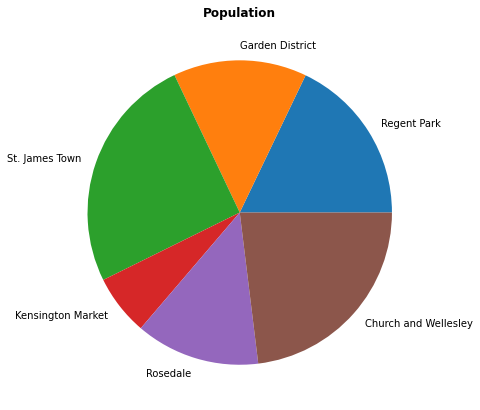

In [40]:
fig=plt.figure(figsize=(10,7))
plt.pie(x= testz['Population'],labels=testz['Neighbourhood'])
plt.title('Population',fontweight="bold")
plt.show()


### Discussion: -
After performing Exploratory data analysis and visualization techniques on extracted datasets, it was observed that in Downtown Toronto there are variety of Cuisine choices available , Also as there is more than 45% of population migrated from all around the globe, Toronto city is one of the best choices where Tourists from every community can visit and live here. From the data analyzed it was noticed that there are 2 Clusters (Cluster 2 and 4) which should be in the first to visit list of tourists as there are variety of Restaurants in almost all the neighborhoods.
Cluster 2 should be the best choice for tourists or residence which belong to European countries or someone who would like to prefer Japanese food.
The reason was that in most of the neighborhoods Italian and Japanese restaurants are among the topmost venues. Also, Cluster 2 is having ‘Indian Restaurants’ and vegan restaurants in many neighborhoods so it would be a best choice for Indian / vegetarian community, But this cluster cannot be the best choice for opening an Indian restaurant which is  a part of our Business statement as there are already many Indian restaurants existing in many areas.

Cluster 4 should be the best choice for American community as most of the neighborhoods are having American restaurants in Top 3 most common venues. Another thing related to our business problem statement is that as this cluster is having many restaurants in all the neighborhoods but an Indian restaurant is not in Top 15 most common venues so Cluster 4 can be considered as one of the choices to open an Indian restaurant.

After performing demographic analysis and predicting the community living in the area Cluster 5 should be the best choice for opening an Indian restaurant because of following reasons:
1.	Cluster 5 is having many restaurants in ‘Regent park’ which is the 4th largest community in terms of population and the 2nd most common language being spoken is ‘Bengali’
2.	In Cluster 5, No Indian restaurant is in top 15 most common venues thus opening an Indian restaurant may attract more population from the neighborhood and hence might yield more revenue and increase in sales.



### Conclusion: - 
With the help all the datasets analyzed, Foursquare API was of a great support in extracting valuable insights related to most common and famous venues like bars, restaurants etc. These insights were a great support in analyzing our business problem statement. By combining all information and performing visualization we were able to Unify variety of restaurants and were mapped with specific Neighborhoods. This could be of a great support for tourists or people who prefer to have Cuisine choices of their countries that they can easily follow clusters of restaurants in their nearby Neighborhoods.
By further analyzing clusters created using Kmeans clustering algorithm and the demographic data, there were certain clusters/neighborhoods identified where there is a business opportunity of opening an Indian restaurant and the recommendation of opening in certain cluster or in certain neighborhood could be followed to yield more revenue and increase in sales.
